In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
names = ['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
          'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
          'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
          'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
          'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
          'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
          'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
          'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'other']

df = pd.read_csv('KDDTrain+.txt', names=names, header=None)
df.head()

duration protocol   service flag  src_bytes  dst_bytes  land  \
0         0      tcp  ftp_data   SF        491          0     0   
1         0      udp     other   SF        146          0     0   
2         0      tcp   private   S0          0          0     0   
3         0      tcp      http   SF        232       8153     0   
4         0      tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.17   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.10   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  other  
0       normal     20  
1       normal     15  
2      neptune     19  
3       normal     21  
4       normal     21  

[5 rows x 43 columns]

In [3]:
dft = pd.read_csv('KDDTest+.txt', names=names, header=None)
dft.head()

duration protocol   service  flag  src_bytes  dst_bytes  land  \
0         0      tcp   private   REJ          0          0     0   
1         0      tcp   private   REJ          0          0     0   
2         2      tcp  ftp_data    SF      12983          0     0   
3         0     icmp     eco_i    SF         20          0     0   
4         1      tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.04   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.61   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   attack_type  other  
0      neptune     21  
1      neptune     21  
2       normal     21  
3        saint     15  
4        mscan     11  

[5 rows x 43 columns]

In [4]:
print(df.shape[0], dft.shape[0])
full = pd.concat([df, dft])
print(full.shape[0], df.shape[0] + dft.shape[0])
full.head()

125973 22544
148517 148517


duration protocol   service flag  src_bytes  dst_bytes  land  \
0         0      tcp  ftp_data   SF        491          0     0   
1         0      udp     other   SF        146          0     0   
2         0      tcp   private   S0          0          0     0   
3         0      tcp      http   SF        232       8153     0   
4         0      tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_same_srv_rate  \
0               0       0    0  ...                      0.17   
1               0       0    0  ...                      0.00   
2               0       0    0  ...                      0.10   
3               0       0    0  ...                      1.00   
4               0       0    0  ...                      1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_type  other  
0       normal     20  
1       normal     15  
2      neptune     19  
3       normal     21  
4       normal     21  

[5 rows x 43 columns]

In [5]:
-

['normal' 'attack']
(148517, 44)


/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
full = full.drop(['other', 'attack_type'], axis=1)
print(full.shape)

(148517, 42)


In [7]:
#df2 = pd.get_dummies(df, drop_first=True)
full2 = pd.get_dummies(full, drop_first=True)
full2.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised      ...       flag_RSTO  \
0                  0          0                0      ...               0   
1                  0          0                0      ...               0   
2                  0          0                0      ...               0   
3                  0          1                0      ...               0   
4                  0          1                0      ...               0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        1   
1            0          0        0        0        0        0        1   
2            0          0        1        0        0        0        0   
3            0          0        0        0        0        0        1   
4            0          0        0        0        0        0        1   

   flag_SH  label_normal  
0        0             1  
1        0             1  
2        0             0  
3        0             1  
4        0             1  

[5 rows x 120 columns]

In [8]:
print(full2.shape)

(148517, 120)


In [9]:
features = list(full2.columns[:-1])
print(features)
y_train = full2[0:df.shape[0]]['label_normal']
X_train = full2[0:df.shape[0]][features]
y_test = full2[df.shape[0]:]['label_normal']
X_test = full2[df.shape[0]:][features]

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_tcp', 'protocol_udp', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', '

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(125973, 119) (125973,)
(22544, 119) (22544,)


In [17]:
dt = DecisionTreeClassifier(random_state=99)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
accuracy_score(y_pred, y_test)

0.80491483321504609

In [13]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file="mytree.dot")
#with open("mytree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=99)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)

0.773110361959


In [16]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=99)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred)

0.794490773598


In [18]:
sv = LinearSVC(random_state=1234)
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print(accuracy_score(y_test, y_pred))
fpr_sv, tpr_sv, _ = roc_curve(y_test, y_pred)

0.743656848829


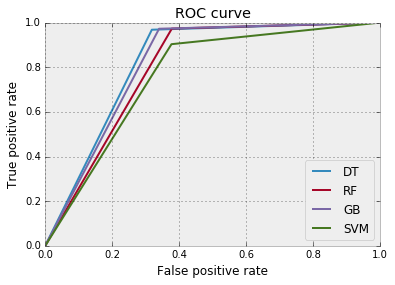

In [19]:
plt.plot(fpr_dt, tpr_dt, label='DT')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.plot(fpr_sv, tpr_sv, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [20]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for Random Forest:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking for Random Forest:
1. feature 1 (0.149935) src_bytes
2. feature 117 (0.087222) flag_SF
3. feature 2 (0.086679) dst_bytes
4. feature 25 (0.068296) same_srv_rate
5. feature 29 (0.057141) dst_host_srv_count
6. feature 30 (0.055331) dst_host_same_srv_rate
7. feature 19 (0.039456) count
8. feature 8 (0.034319) logged_in
9. feature 21 (0.033783) serror_rate
10. feature 26 (0.032041) diff_srv_rate
11. feature 31 (0.030077) dst_host_diff_srv_rate
12. feature 32 (0.029588) dst_host_same_src_port_rate
13. feature 113 (0.027553) flag_S0
14. feature 28 (0.022900) dst_host_count
15. feature 63 (0.022551) service_http
16. feature 22 (0.022380) srv_serror_rate
17. feature 33 (0.019075) dst_host_srv_diff_host_rate
18. feature 54 (0.016985) service_ecr_i
19. feature 88 (0.013741) service_private
20. feature 20 (0.012760) srv_count
21. feature 53 (0.011147) service_eco_i
22. feature 35 (0.010801) dst_host_srv_serror_rate
23. feature 37 (0.009965) dst_host_srv_rerror_rate
24. feature 51 (

In [21]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking for Gradient Boosting:
1. feature 1 (0.328842) src_bytes
2. feature 2 (0.123350) dst_bytes
3. feature 6 (0.083504) hot
4. feature 32 (0.037865) dst_host_same_src_port_rate
5. feature 59 (0.030768) service_ftp_data
6. feature 19 (0.030686) count
7. feature 88 (0.025497) service_private
8. feature 29 (0.025425) dst_host_srv_count
9. feature 33 (0.024150) dst_host_srv_diff_host_rate
10. feature 0 (0.023590) duration
11. feature 54 (0.023163) service_ecr_i
12. feature 7 (0.020636) num_failed_logins
13. feature 31 (0.018776) dst_host_diff_srv_rate
14. feature 9 (0.017947) num_compromised
15. feature 28 (0.017509) dst_host_count
16. feature 63 (0.016616) service_http
17. feature 30 (0.016030) dst_host_same_srv_rate
18. feature 53 (0.011143) service_eco_i
19. feature 18 (0.011122) is_guest_login
20. feature 112 (0.011018) flag_RSTR
21. feature 113 (0.007757) flag_S0
22. feature 36 (0.006786) dst_host_rerror_rate
23. feature 102 (0.006464) service_time
24. feature 4 (0.006058) 

In [22]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking:
1. feature 1 (0.739488) src_bytes
2. feature 54 (0.075374) service_ecr_i
3. feature 63 (0.056371) service_http
4. feature 30 (0.028339) dst_host_same_srv_rate
5. feature 2 (0.022211) dst_bytes
6. feature 6 (0.021556) hot
7. feature 8 (0.010260) logged_in
8. feature 59 (0.007153) service_ftp_data
9. feature 29 (0.004445) dst_host_srv_count
10. feature 38 (0.004398) protocol_tcp
11. feature 0 (0.003712) duration
12. feature 33 (0.003644) dst_host_srv_diff_host_rate
13. feature 36 (0.003294) dst_host_rerror_rate
14. feature 32 (0.003149) dst_host_same_src_port_rate
15. feature 19 (0.002041) count
16. feature 31 (0.001618) dst_host_diff_srv_rate
17. feature 88 (0.001515) service_private
18. feature 35 (0.001484) dst_host_srv_serror_rate
19. feature 28 (0.001234) dst_host_count
20. feature 110 (0.001209) flag_RSTO
21. feature 114 (0.001003) flag_S1
22. feature 93 (0.000863) service_smtp
23. feature 57 (0.000759) service_finger
24. feature 21 (0.000754) serror_rate
25. featu

In [24]:
df.dtypes

duration                         int64
protocol                        object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [28]:
# Use Label encoder for the Decision Tree
le = LabelEncoder()
le.fit(["normal", "attack"])
full.label = le.transform(full.label) 

le.fit(full.service.unique())
full.service = le.transform(full.service)

le.fit(full.flag.unique())
full.flag = le.transform(full.flag)

le.fit(full.protocol.unique())
full.protocol = le.transform(full.protocol)

full.head()

duration  protocol  service  flag  src_bytes  dst_bytes  land  \
0         0         1       20     9        491          0     0   
1         0         2       44     9        146          0     0   
2         0         1       49     5          0          0     0   
3         0         1       24     9        232       8153     0   
4         0         1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...    dst_host_srv_count  \
0               0       0    0  ...                    25   
1               0       0    0  ...                     1   
2               0       0    0  ...                    26   
3               0       0    0  ...                   255   
4               0       0    0  ...                   255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  label  
0                      0.00      1  
1                      0.00      1  
2                      0.00      0  
3                      0.01      1  
4                      0.00      1  

[5 rows x 42 columns]

In [29]:
features = list(full.columns[:-1])
print(features)
y_train = full[0:df.shape[0]]['label']
X_train = full[0:df.shape[0]][features]
y_test = full[df.shape[0]:]['label']
X_test = full[df.shape[0]:][features]

['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(125973, 41) (125973,)
(22544, 41) (22544,)


In [31]:
dt = DecisionTreeClassifier(random_state=99)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
accuracy_score(y_pred, y_test)

0.79293825408090846

In [33]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking for Gradient Boosting:
1. feature 4 (0.755159) src_bytes
2. feature 1 (0.066188) protocol
3. feature 32 (0.050953) dst_host_srv_count
4. feature 40 (0.024990) dst_host_srv_rerror_rate
5. feature 5 (0.023961) dst_bytes
6. feature 9 (0.021508) hot
7. feature 2 (0.010164) service
8. feature 11 (0.010013) logged_in
9. feature 35 (0.007809) dst_host_same_src_port_rate
10. feature 33 (0.007141) dst_host_same_srv_rate
11. feature 36 (0.004770) dst_host_srv_diff_host_rate
12. feature 0 (0.004044) duration
13. feature 39 (0.003562) dst_host_rerror_rate
14. feature 31 (0.001844) dst_host_count
15. feature 34 (0.001535) dst_host_diff_srv_rate
16. feature 3 (0.001250) flag
17. feature 37 (0.001099) dst_host_serror_rate
18. feature 29 (0.000843) diff_srv_rate
19. feature 23 (0.000734) srv_count
20. feature 22 (0.000563) count
21. feature 24 (0.000405) serror_rate
22. feature 25 (0.000359) srv_serror_rate
23. feature 38 (0.000309) dst_host_srv_serror_rate
24. feature 30 (0.000157) sr